<a href="https://colab.research.google.com/github/SN1004/MBML/blob/main/MBML_Assginment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

# 1

In [15]:
def fa(x,A,b):
  xt=np.transpose(x)
  return np.dot(xt,np.dot(A,x))+b
def fb(x,A,b):
  xt=np.transpose(x)
  return np.power(np.linalg.norm(np.dot(A,x)-b,ord=2),2)
def fc(x,A,b):
  xt=np.transpose(x)
  return np.power(np.linalg.norm(np.dot(A,x)-b,ord=2),2)

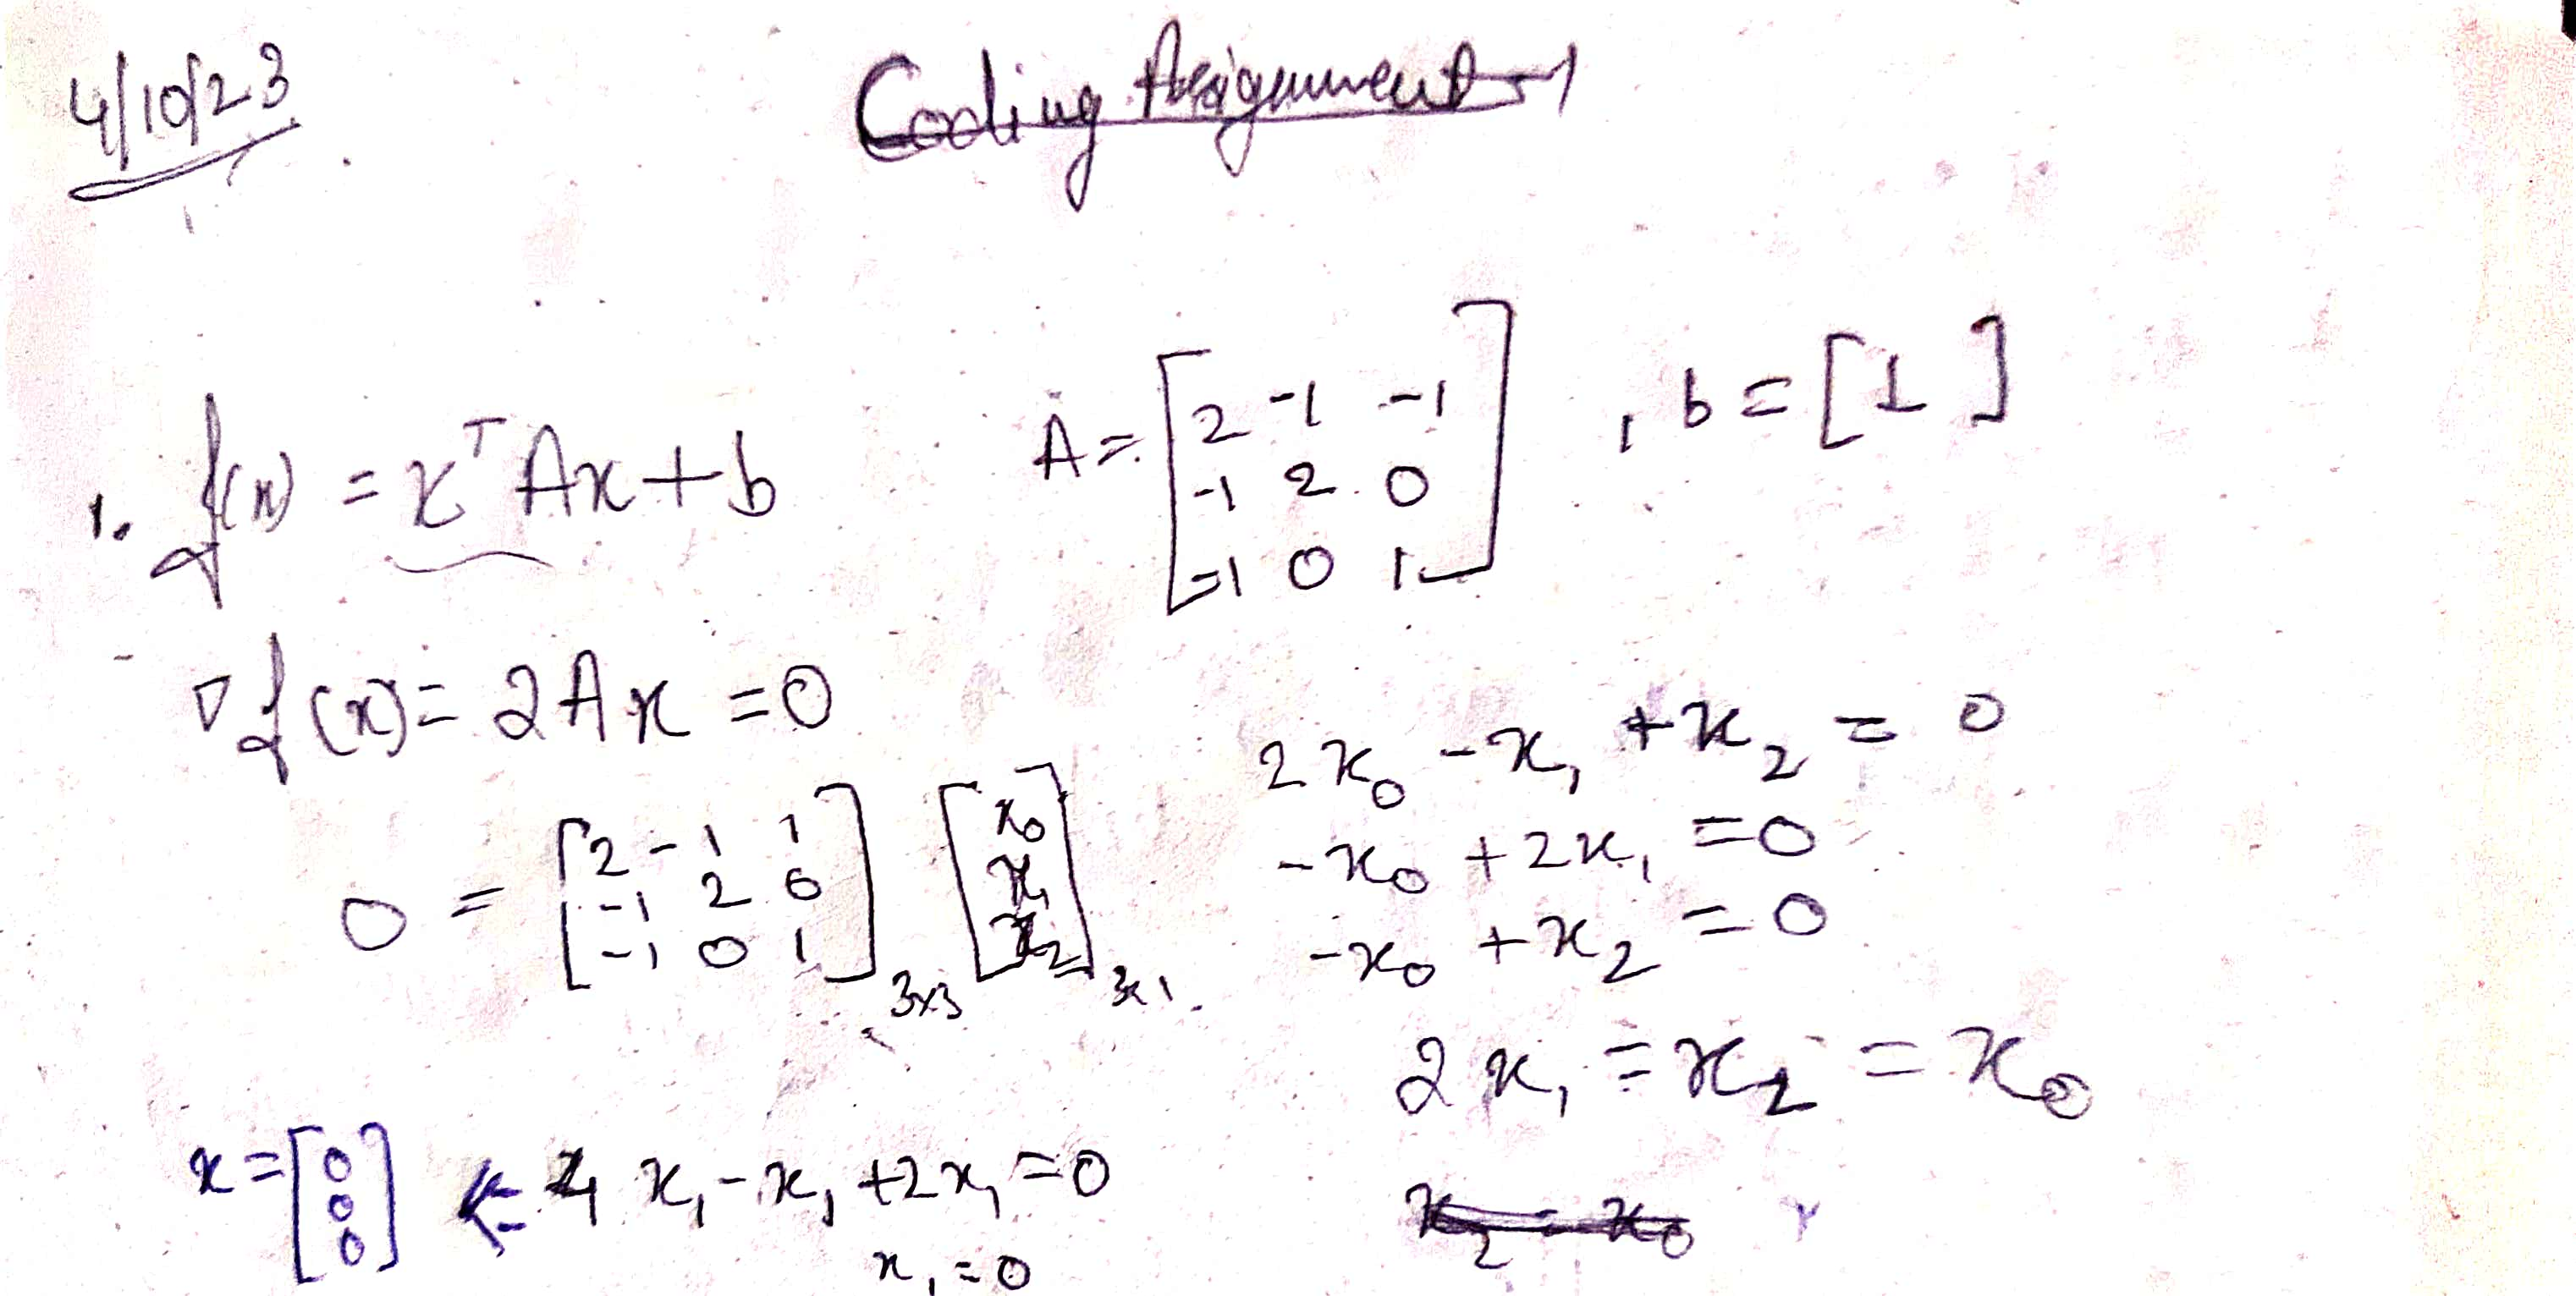

we can see that if x = null matrix f(x) is b which is [1]

In [16]:
# a
iterations = []
solve_values = []

x=np.random.rand(3,1)
A=np.array([[2,-1,-1],[-1,2,0],[-1,0,1]])
b=np.array([1])
for i in range(1000):
  deltaf=2*np.dot(A,x)
  x=x-0.02*(deltaf/np.linalg.norm(deltaf,ord=2))
  iterations.append(i)
  solve_values.append(fa(x,A,b).flatten())
x

array([[ 0.00763831],
       [-0.00612545],
       [-0.00339937]])

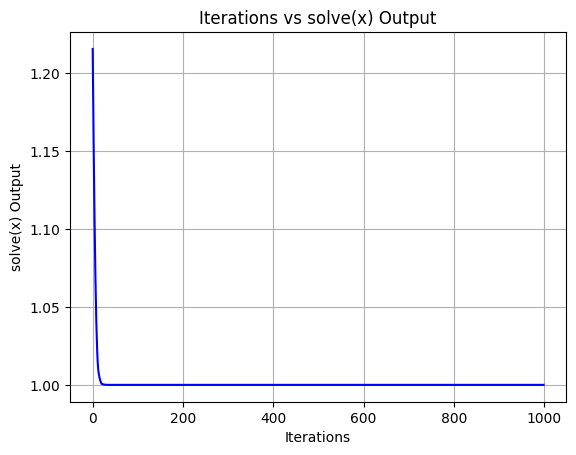

In [17]:
plt.plot(iterations, solve_values, linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('solve(x) Output')
plt.title('Iterations vs solve(x) Output')
plt.grid(True)
plt.show()

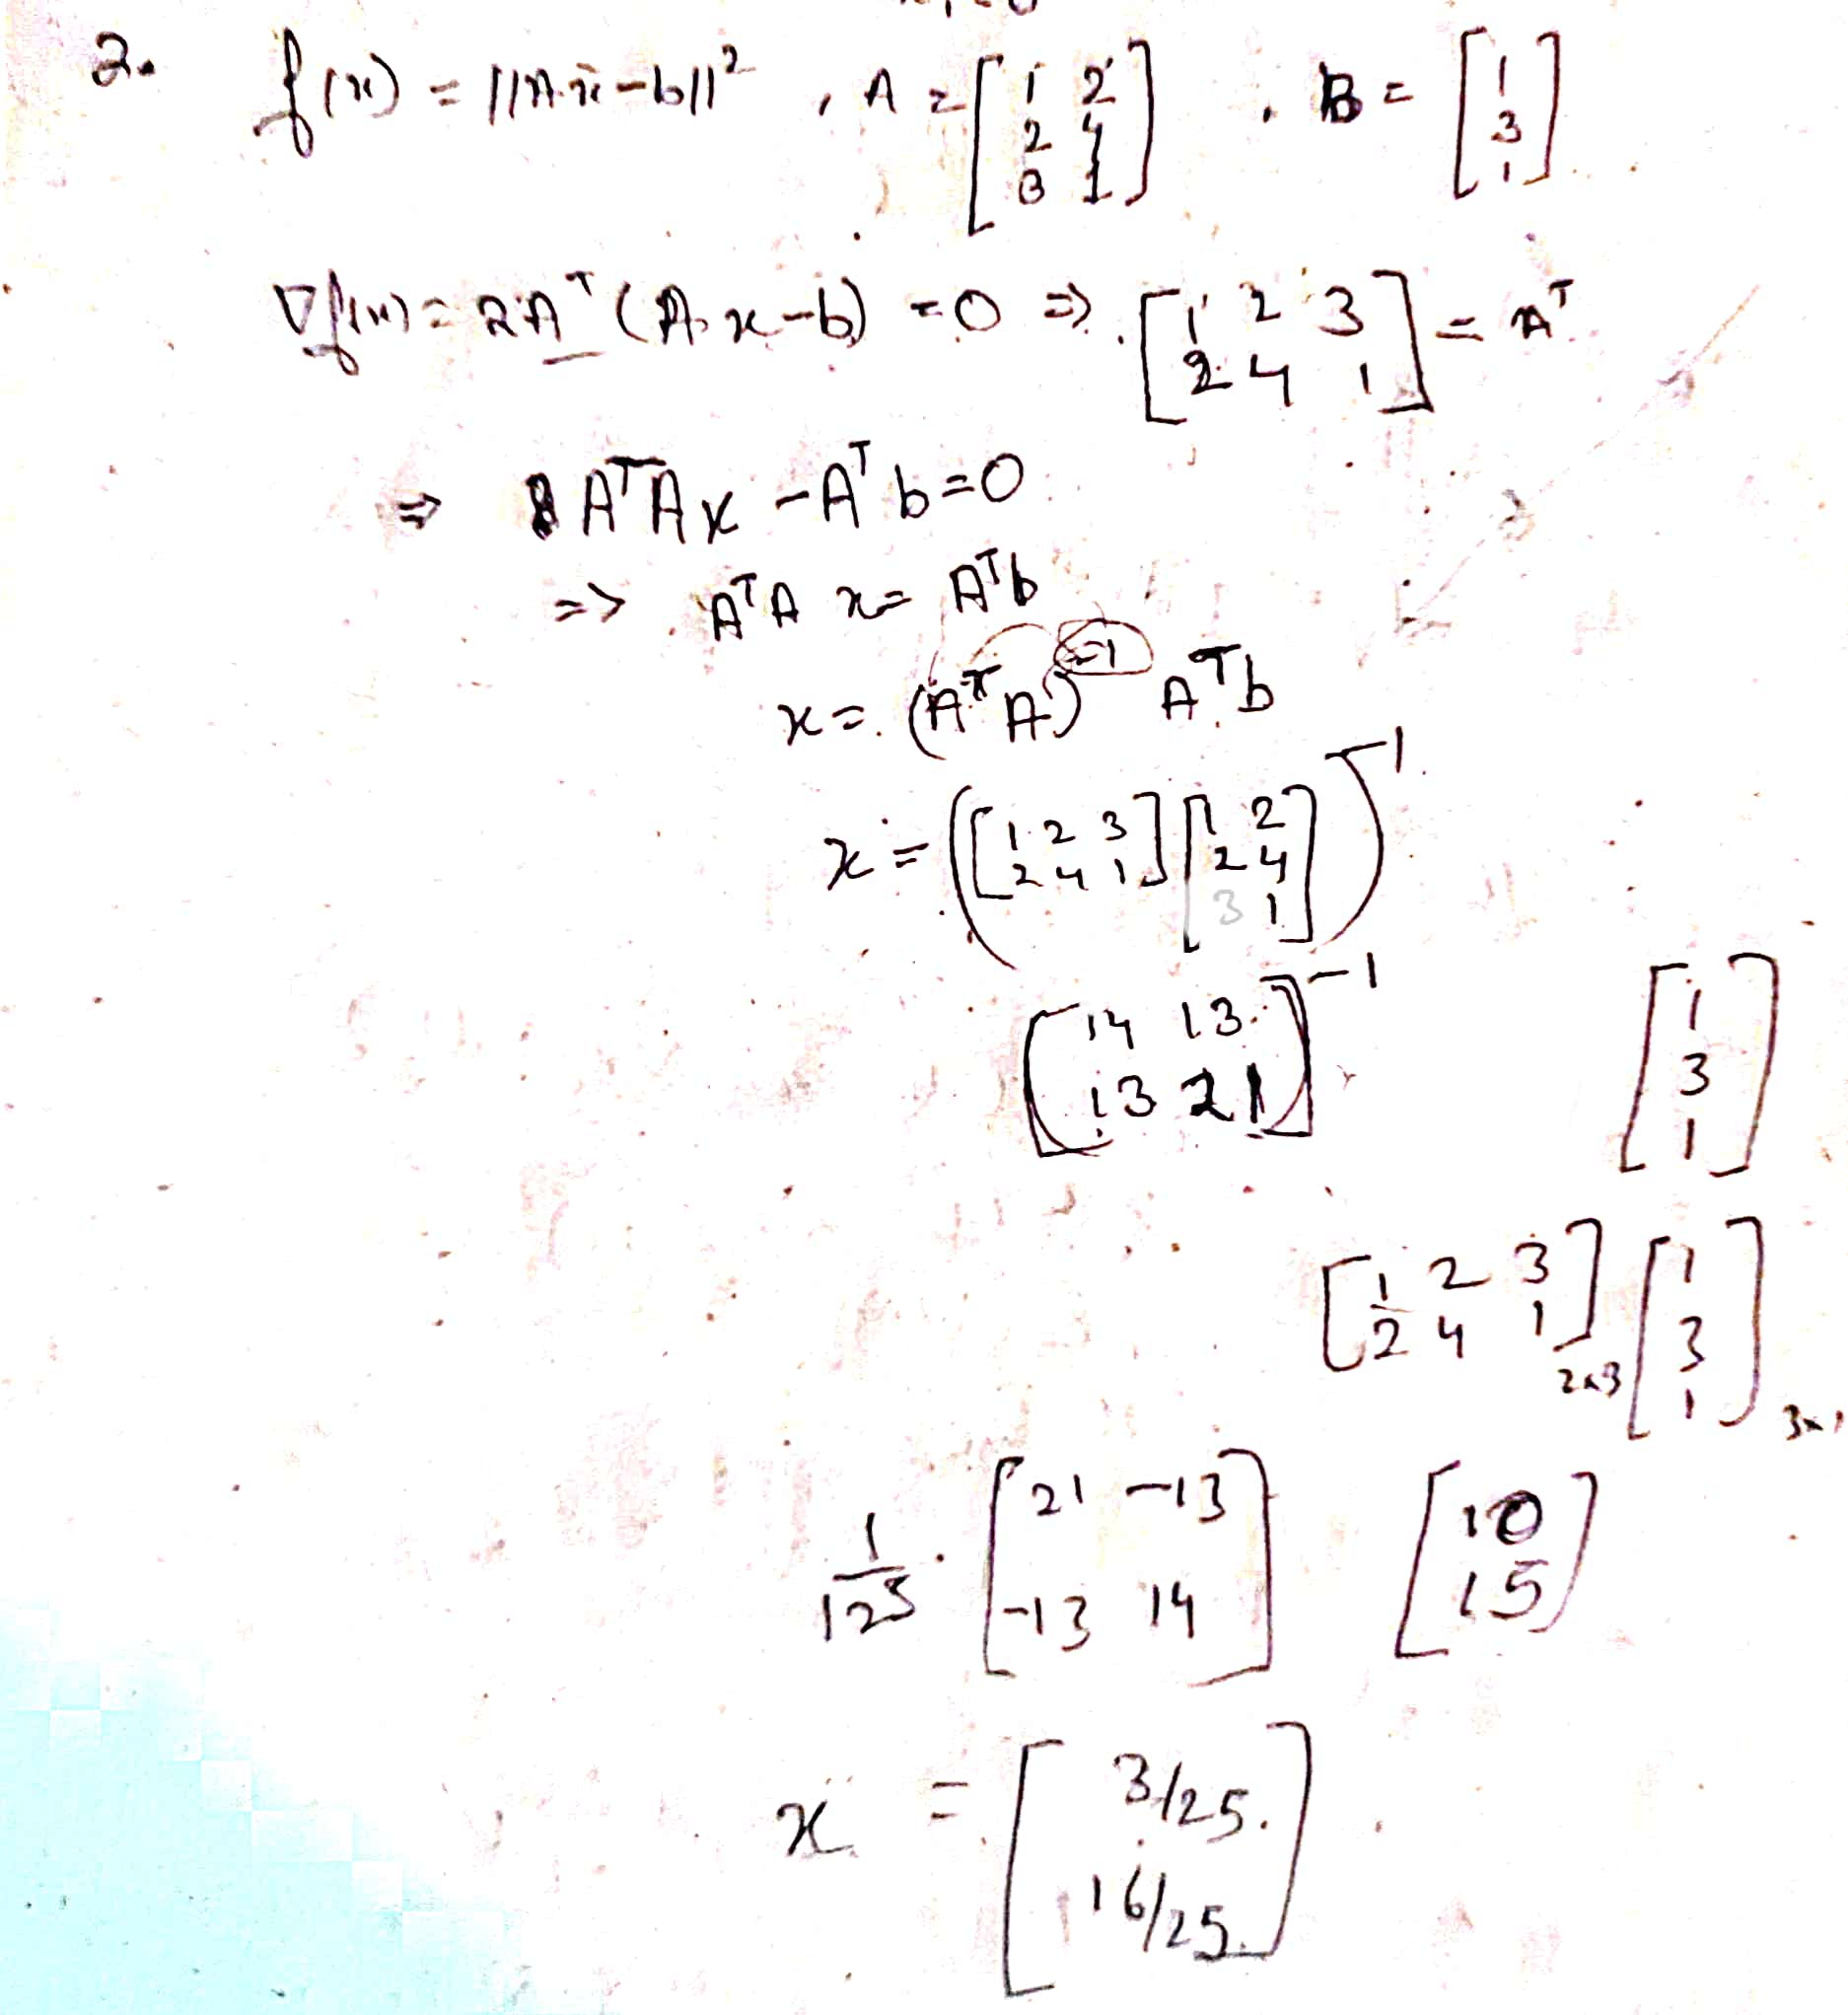

In [18]:
# f(x) at found x is
A=np.array([[1,2],[2,4],[3,1]])
b=np.array([[1],[3],[1]])
fb(np.array([[0.12],[0.64]]),A,b).flatten()

array([0.2])

In [19]:
# b
iterations = []
solve_values = []

x=np.random.rand(2,1)
A=np.array([[1,2],[2,4],[3,1]])
b=np.array([[1],[3],[1]])
for i in range(1000):
  deltaf=2*np.dot(np.transpose(A),np.dot(A,x)-b);
  x=x-0.02*(deltaf/np.linalg.norm(deltaf,ord=2))
  iterations.append(i)
  solve_values.append(fb(x,A,b).flatten())
x

array([[0.11139152],
       [0.62876732]])

In [20]:
solve_values[-1]

array([0.20620122])

This is same as analytical solution

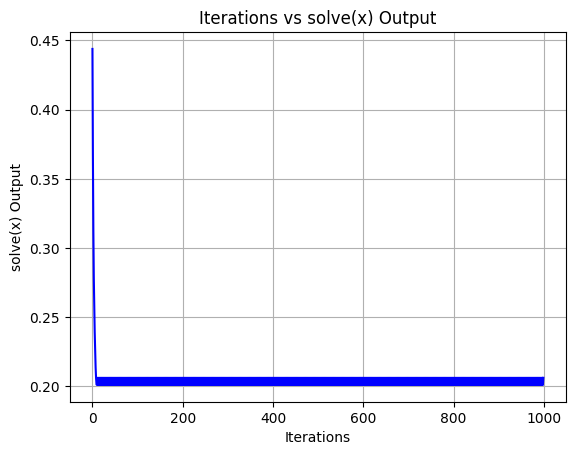

In [21]:
plt.plot(iterations, solve_values, linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('solve(x) Output')
plt.title('Iterations vs solve(x) Output')
plt.grid(True)
plt.show()

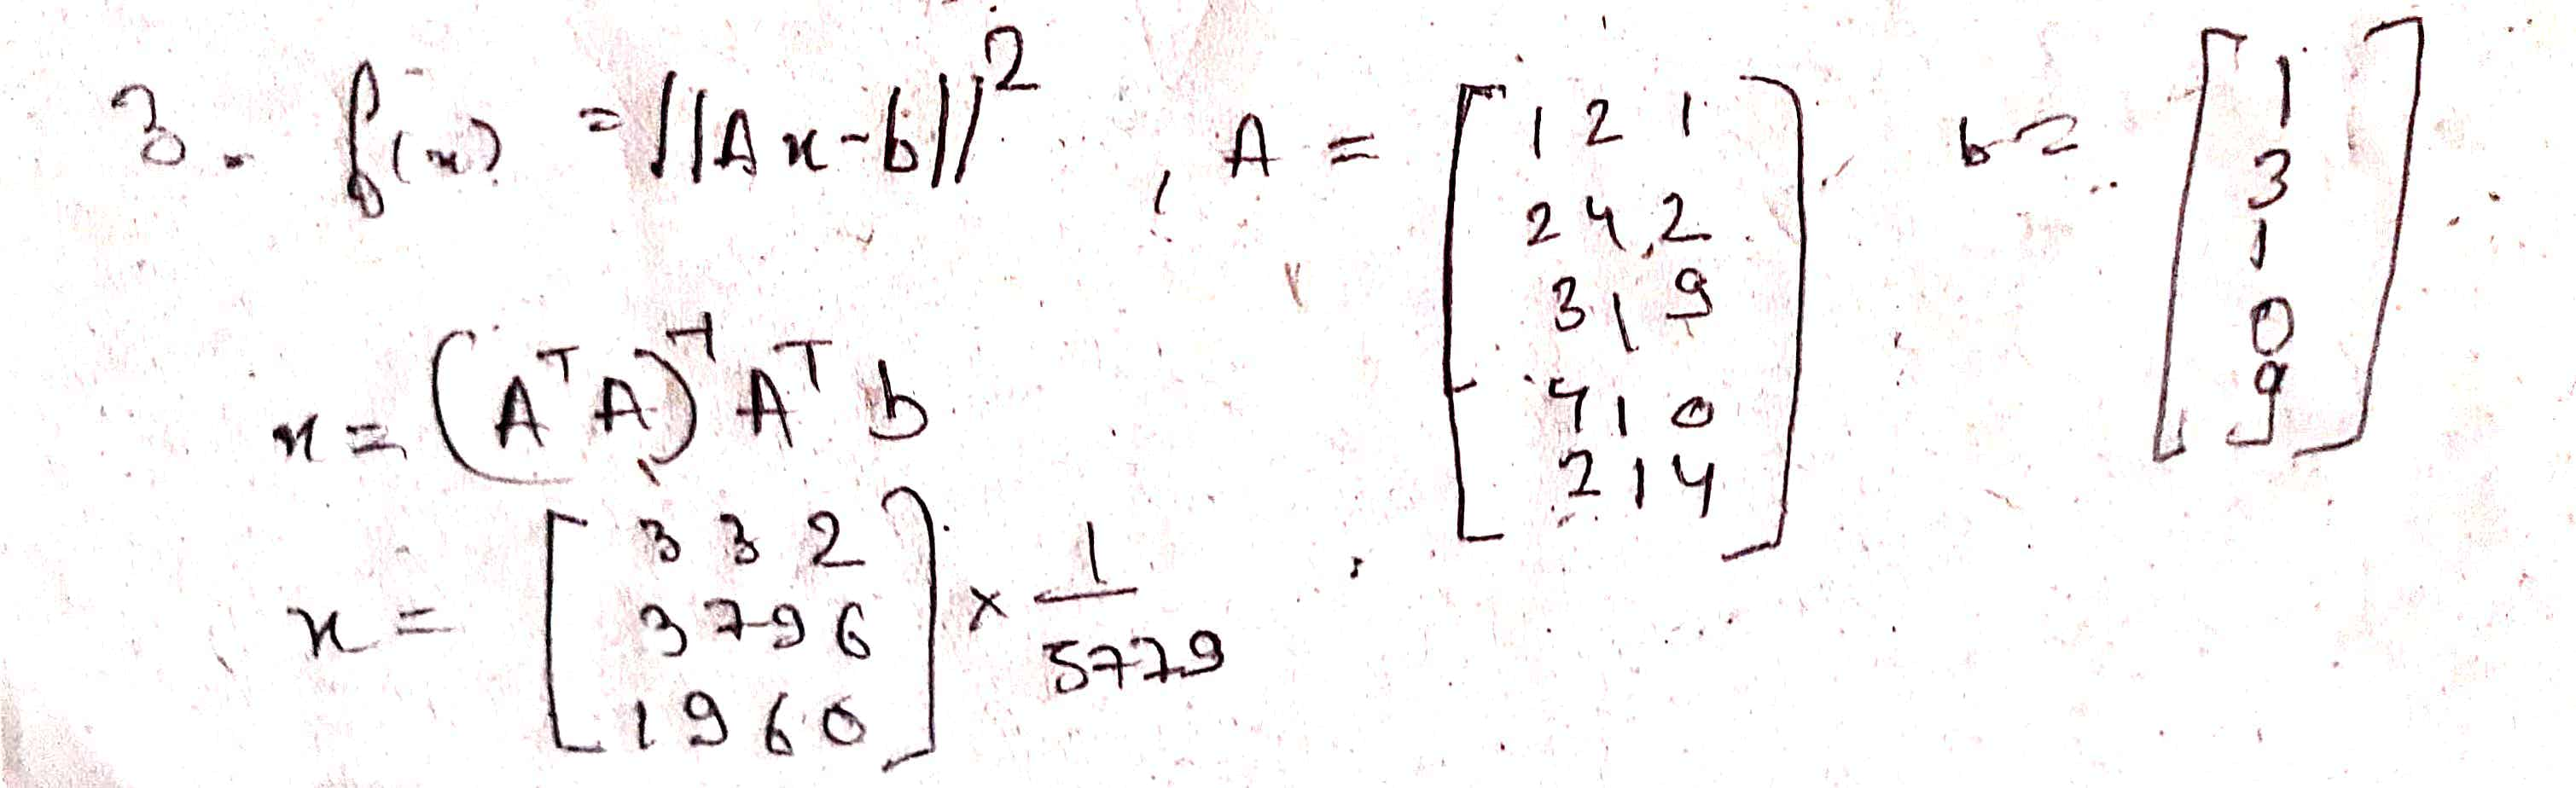

In [22]:
# f(x) at found x is
A=np.array([[1,2,1],[2,4,2],[3,1,9],[4,1,0],[2,1,4]])
b=np.array([[1],[3],[1],[0],[9]])
# 332/5779 = 0.057, 3796/5779 = 0.657, 1960/5779 = 0.339
fb(np.array([[0.057],[0.657],[0.339]]),A,b).flatten()

array([56.990495])

In [23]:
# c
iterations = []
solve_values = []

x=np.random.rand(3,1)
A=np.array([[1,2,1],[2,4,2],[3,1,9],[4,1,0],[2,1,4]])
b=np.array([[1],[3],[1],[0],[9]])
for i in range(1000):
  deltaf=2*np.dot(np.transpose(A),np.dot(A,x)-b);
  x=x-0.002*(deltaf/np.linalg.norm(deltaf,ord=2))
  iterations.append(i)
  solve_values.append(fc(x,A,b).flatten())
x

array([[0.05698501],
       [0.65656851],
       [0.33820168]])

In [24]:
solve_values[-1]

array([56.99063918])

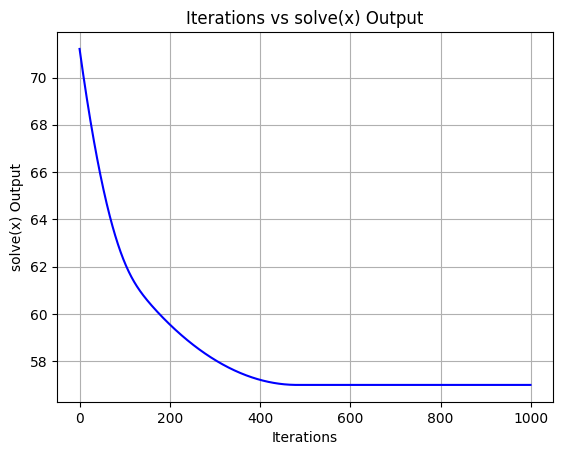

In [25]:
plt.plot(iterations, solve_values, linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('solve(x) Output')
plt.title('Iterations vs solve(x) Output')
plt.grid(True)
plt.show()

# 2.

# a.

In [26]:
A = sklearn.datasets.make_spd_matrix(3)
A

array([[ 0.34248289, -0.27037314, -0.1392618 ],
       [-0.27037314,  2.72448277,  1.09651126],
       [-0.1392618 ,  1.09651126,  0.536502  ]])

In [27]:
b= np.random.rand(3,1)
b

array([[0.96799087],
       [0.48429052],
       [0.64084375]])

In [28]:
bt = np.transpose(b)
bt

array([[0.96799087, 0.48429052, 0.64084375]])

In [29]:
c= np.random.rand(1)
c

array([0.83979535])

In [30]:
xans = np.dot(np.linalg.inv(A),b)
xans

array([[ 3.78758128],
       [-1.81925776],
       [ 5.89586942]])

# b.

In [31]:
def solve(x):
  xt = np.transpose(x)
  return np.dot(xt,np.dot(A,x))-2*np.dot(bt,x)+c

In [32]:
x = np.full((3,1),0.1)
x

array([[0.1],
       [0.1],
       [0.1]])

In [33]:
print(A.shape)
print(b.shape)
print(c.shape)
print(x.shape)

(3, 3)
(3, 1)
(1,)
(3, 1)


In [34]:
s = solve(x)
s

array([[0.47094253]])

In [35]:
normA= np.linalg.norm(A, ord=2)
normb= np.linalg.norm(b)
step_size = 1/(2*normA+normb)
step_size

0.13019583370929116

In [36]:
iterations = []
solve_values = []

for i in range(1000):
    x = x - step_size * (np.dot(A, x) - b) / 2
    iterations.append(i)
    solve_values.append(solve(x).flatten())
x

array([[ 3.78360055],
       [-1.80535256],
       [ 5.86133839]])

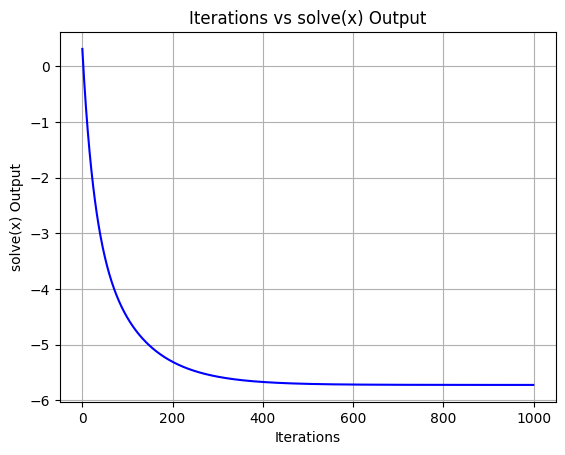

In [37]:
plt.plot(iterations, solve_values, linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('solve(x) Output')
plt.title('Iterations vs solve(x) Output')
plt.grid(True)
plt.show()